# Cleaning the data

We have created three csv files called mvps.csv, players.csv and teams.csv by scraping data from the web. In this notebook, I have **explored each dataset and cleaned it** as the situation demanded. Finally, I have done some **exploratory data analysis**.

### Cleaning the MVPs dataset

In [111]:
import pandas as pd

In [112]:
mvps = pd.read_csv("mvps.csv")
mvps.head()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,...,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,1980
1,1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,...,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,1980
2,2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,...,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,1980
3,3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,...,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,1980
4,4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,...,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1980


We dont need columns like AST TRB, WS and so on beacuse this info is already present in the players table. So, **we will only include columns relevent to mvp selection**.

In [113]:
# all the steals, assists are already in the player data. So we can remove them from mvp data.
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Kareem Abdul-Jabbar,1980,147.0,221,0.665
1,Julius Erving,1980,31.5,221,0.143
2,George Gervin,1980,19.0,221,0.086
3,Larry Bird,1980,15.0,221,0.068
4,Tiny Archibald,1980,2.0,221,0.009


### Cleaning the players data.

In [114]:
players = pd.read_csv("players.csv")
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980


In [115]:
# deleted two columns beacuse they dont provide any information.
del players["Unnamed: 0"]
del players["Rk"]

In [116]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,.604,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,.481,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,.531,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,.482,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,.450,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980


Some players have an **asterisk in their name**. Removing it so that we can merge properly later on.

In [117]:
# some players have asterisk, so remove it.
players["Player"] = players["Player"].str.replace("*","", regex = False)
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,.604,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,.481,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,.531,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,Tiny Archibald,PG,31,BOS,80,80,35.8,4.8,9.9,.482,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,.450,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980


Some players **played for multiple teams in a season** like Greg Anderson played for four teams in 1991.

In [118]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
3067,Greg Anderson,PF,23,SAS,82,45,24.2,4.6,9.2,.501,...,2.0,4.3,6.3,1.0,0.7,1.5,1.7,2.8,11.7,1988
3514,Greg Anderson,PF,24,SAS,82,56,29.3,5.6,11.1,.503,...,3.1,5.1,8.2,0.7,1.2,1.3,2.2,2.7,13.7,1989
3961,Greg Anderson,PF,25,MIL,60,28,21.5,3.7,7.2,.507,...,1.9,4.4,6.2,0.4,0.5,0.9,1.3,2.9,8.8,1990
4439,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
4440,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
4441,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
4442,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991
4898,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
5843,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
6342,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995


In [119]:
## defining a function that groups everything by year and assigns the last team they played for as their team for the full season.
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row
    
players = players.groupby(["Player", "Year"]).apply(single_row)

In [120]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                             
A.C. Green    1986 2388     A.C. Green  PF  22  LAL  82   1  18.8  2.5   4.7   
              1987 2787     A.C. Green  PF  23  LAL  79  72  28.4  4.0   7.4   
              1988 3189     A.C. Green  PF  24  LAL  82  64  32.1  3.9   7.8   
              1989 3638     A.C. Green  PF  25  LAL  82  82  30.6  4.9   9.2   
              1990 4100     A.C. Green  PF  26  LAL  82  82  33.0  4.7   9.8   
              1991 4595     A.C. Green  PF  27  LAL  82  21  26.4  3.1   6.6   
              1992 5064     A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 5523     A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 6010     A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 6498     A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 6994     A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 7569     A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 8156     A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 8714     A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 9242     A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 9761     A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 9115  A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1991 4558   A.J. English  SG  23  WSB  70  12  20.6  3.6   8.2   
              1992 5028   A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Guyton   2001 9764    A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   

                          FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year             ...                                           
A.C. Green    1986 2388  .539  ...  2.0  2.7  4.6  0.7  0.6  0.6  1.2  2.8   
              1987 2787  .538  ...  2.7  5.1  7.8  1.1  0.9  1.0  1.3  2.2   
              1988 3189  .503  ...  3.0  5.7  8.7  1.1  1.1  0.5  1.5  2.5   
              1989 3638  .529  ...  3.1  5.9  9.0  1.3  1.1  0.7  1.5  2.1   
              1990 4100  .478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4  2.5   
              1991 4595  .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 5064  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 5523  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 6010  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 6498  .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 6994  .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 7569  .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 8156  .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 8714  .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 9242  .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 9761  .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 9115  .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1991 4558  .439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 5028  .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Guyton   2001 9764  .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   

                          PTS  Year  
Player        Year                   
A.C. Green    1986 2388   6.4  1986  
              1987 2787  10.8  1987  
              1988 3189  11.4  1988  
              1989 3638  13.3  1989  
              1990 4100  12.9  1990  
              1991 4595   9.1  1991  
              1992 5064  13.6  1992  
              1993 5523  12.8  1993  
              1994 6010  14.7  1994  
              1995 6498  11.2  1995  
              1996 6994   7.5  1996  
              1997 7569   7.2  1997  
              1998 815

In [121]:
# We have inadvertently created extra level in our dataframe so removing those levels for easier loading into pandas.
players.index = players.index.droplevel()

In [122]:
players.index = players.index.droplevel()

In [123]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2388,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
2787,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
3189,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
3638,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
4100,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990


In [124]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
3067,Greg Anderson,PF,23,SAS,82,45,24.2,4.6,9.2,.501,...,2.0,4.3,6.3,1.0,0.7,1.5,1.7,2.8,11.7,1988
3514,Greg Anderson,PF,24,SAS,82,56,29.3,5.6,11.1,.503,...,3.1,5.1,8.2,0.7,1.2,1.3,2.2,2.7,13.7,1989
3961,Greg Anderson,PF,25,MIL,60,28,21.5,3.7,7.2,.507,...,1.9,4.4,6.2,0.4,0.5,0.9,1.3,2.9,8.8,1990
4439,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
4898,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
5843,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
6342,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
6812,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
7379,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
7972,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


### Merging players and MVP data.

In [125]:
# combine players and mvp
combined = players.merge(mvps, how = "outer", on = ["Player", "Year"])

In [126]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,NaN,NaN,NaN
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,NaN,NaN,NaN
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,NaN,NaN,NaN
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,NaN,NaN,NaN
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN


A lot of players got no votes in MVP race and therefore were not in the MVP table. As such the **combined table is populated with NaN values**. We will **fill all these with 0**.

In [127]:
# need to change pts won, pts max and share from nan to 0
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [128]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.000
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.000
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.000
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.000
18241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.000
18242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.000
18243,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.3,0.2,0.7,0.8,2.0,4.7,2006,0.0,0.0,0.000


In [129]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
159,Adrian Dantley,SF,25,UTA,80,NaN,42.7,11.4,20.3,.559,...,4.0,1.4,0.2,3.5,3.1,30.7,1981,15.0,690.0,0.022
160,Adrian Dantley,SF,26,UTA,81,81,39.8,11.2,19.6,.570,...,4.0,1.2,0.2,3.7,3.1,30.3,1982,7.0,690.0,0.010
162,Adrian Dantley,SF,28,UTA,79,79,37.8,10.2,18.2,.558,...,3.9,0.8,0.1,3.3,2.5,30.6,1984,88.0,760.0,0.116
164,Adrian Dantley,SF,30,UTA,76,75,36.1,10.8,19.1,.563,...,3.5,0.8,0.1,3.0,2.7,29.8,1986,2.0,780.0,0.003
166,Adrian Dantley,SF,32,DET,69,50,31.1,6.4,12.5,.514,...,2.5,0.6,0.1,2.0,2.1,20.0,1988,1.0,800.0,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18056,World B. Free,SG,30,CLE,75,71,31.7,8.3,18.8,.445,...,3.0,1.3,0.1,2.1,2.9,22.3,1984,1.0,760.0,0.001
18057,World B. Free,SG,31,CLE,71,50,31.7,8.6,18.7,.459,...,4.5,1.1,0.2,2.0,2.3,22.5,1985,2.0,780.0,0.003
18093,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001
18098,Yao Ming,C,28,HOU,77,77,33.6,7.4,13.4,.548,...,1.8,0.4,1.9,3.0,3.3,19.7,2009,1.0,1210.0,0.001


### Cleaning the team data

In [132]:
teams = pd.read_csv("teams.csv")
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics*
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers*
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets*
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets
5,5,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1980,Central Division
6,6,50,32,.610,—,104.5,101.6,2.83,1980,Atlanta Hawks*
7,7,41,41,.500,9.0,110.8,110.6,0.27,1980,Houston Rockets*
8,8,41,41,.500,9.0,119.4,119.7,-0.24,1980,San Antonio Spurs*
9,9,37,45,.451,13.0,111.2,111.9,-0.54,1980,Indiana Pacers


While scraping the data we got **rows with the division information**. Removing these rows.

In [133]:
teams = teams[~teams["W"].str.contains("Division")]

In [134]:
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics*
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers*
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets*
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets
6,6,50,32,.610,—,104.5,101.6,2.83,1980,Atlanta Hawks*
7,7,41,41,.500,9.0,110.8,110.6,0.27,1980,Houston Rockets*
8,8,41,41,.500,9.0,119.4,119.7,-0.24,1980,San Antonio Spurs*
9,9,37,45,.451,13.0,111.2,111.9,-0.54,1980,Indiana Pacers
10,10,37,45,.451,13.0,114.1,113.8,0.43,1980,Cleveland Cavaliers


In [135]:
# removing the asterisk from the team names.
teams["Team"] = teams["Team"].str.replace("*","", regex = False)
teams.head()

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets


In [136]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'Washington Bullets',
       'New York Knicks', 'New Jersey Nets', 'Atlanta Hawks',
       'Houston Rockets', 'San Antonio Spurs', 'Indiana Pacers',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Milwaukee Bucks',
       'Kansas City Kings', 'Denver Nuggets', 'Chicago Bulls',
       'Utah Jazz', 'Los Angeles Lakers', 'Seattle SuperSonics',
       'Phoenix Suns', 'Portland Trail Blazers', 'San Diego Clippers',
       'Golden State Warriors', 'Dallas Mavericks',
       'Los Angeles Clippers', 'Sacramento Kings', 'Charlotte Hornets',
       'Miami Heat', 'Orlando Magic', 'Minnesota Timberwolves',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [137]:
combined["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'SDC', 'NOP',
       'BRK', 'SAS', 'CHH', 'KCK', nan], dtype=object)

The team name is full name is teams and is an abbreviation in combined. To merge them properly, we need to **create a mapping that maps the abbreviation to the full name**.

In [138]:
nicknames = {}

with open("nicknames.txt") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n","").split(",")
        nicknames[abbrev] = name

In [141]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [142]:
combined["Team"] = combined["Tm"].map(nicknames)

In [143]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers
1,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,.538,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.000,Los Angeles Lakers
2,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,.503,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.000,Los Angeles Lakers
3,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,.529,...,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.000,Los Angeles Lakers
4,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.000,Los Angeles Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18240,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.000,Detroit Pistons
18241,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.000,Atlanta Hawks
18242,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.000,Los Angeles Clippers
18243,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.2,0.7,0.8,2.0,4.7,2006,0.0,0.0,0.000,Los Angeles Clippers


### Combining all the data into one table.

In [144]:
stats = combined.merge(teams, how = "outer", on = ["Team", "Year"])

In [145]:
stats = stats[~pd.isnull(stats["Player"])]

In [146]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,.539,...,0.000,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
1,Byron Scott,SG,24,LAL,76,62,28.8,6.7,13.0,.513,...,0.000,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
2,James Worthy,SF,24,LAL,75,73,32.7,8.4,14.5,.579,...,0.009,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
3,Jerome Henderson,C,26,LAL,1,0,3.0,2.0,3.0,.667,...,0.000,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38,LAL,79,79,33.3,9.6,16.9,.564,...,0.173,Los Angeles Lakers,8.0,62,20,.756,—,117.3,109.5,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18240,Mike Gale,PG,29,SAS,67,NaN,22.0,2.6,5.6,.454,...,0.000,San Antonio Spurs,8.0,41,41,.500,9.0,119.4,119.7,-0.24
18241,Paul Griffin,C,26,SAS,82,NaN,22.1,2.1,3.8,.553,...,0.000,San Antonio Spurs,8.0,41,41,.500,9.0,119.4,119.7,-0.24
18242,Sylvester Norris,C,22,SAS,17,NaN,11.1,1.1,2.5,.419,...,0.000,San Antonio Spurs,8.0,41,41,.500,9.0,119.4,119.7,-0.24
18243,Tim Bassett,PF,28,SAS,12,NaN,13.7,1.0,2.8,.353,...,0.000,San Antonio Spurs,8.0,41,41,.500,9.0,119.4,119.7,-0.24


In [147]:
del stats["Unnamed: 0"]

### Checking the data types

In [148]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

We want most of these columns as float or int since these are numbers. So we will **change these to numeric**.

In [149]:
stats = stats.apply(pd.to_numeric, errors = "ignore")

In [150]:
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [151]:
stats["GB"].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', nan, '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5'], dtype=object)

In [152]:
## we notice that there is a dash in "GB" column. Replacing it with 0.
stats["GB"] = stats["GB"].str.replace("—","0")

In [153]:
stats["GB"].unique()

array(['0', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', nan, '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5'], dtype=object)

In [154]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [156]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
1,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
2,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,...,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
3,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,...,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84
4,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,...,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84


In [155]:
stats.to_csv("player_mvp_stats.csv")

### Exploratory Data Analysis

#### VP player distribution by playing position.

Text(0.5, 1.0, 'Player Distribution by Position')

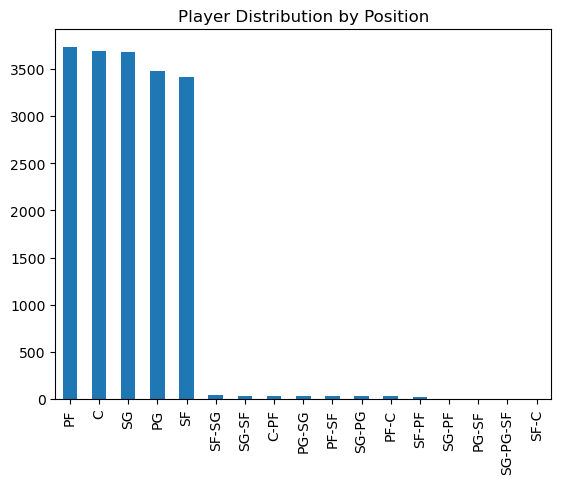

In [159]:
# Player Distribution by Position (Bar Plot)
import matplotlib.pyplot as plt

stats["Pos"].value_counts().plot(kind="bar")
plt.title("Player Distribution by Position")

#### VP distribution by age.

Text(0.5, 1.0, 'Player Age Distribution')

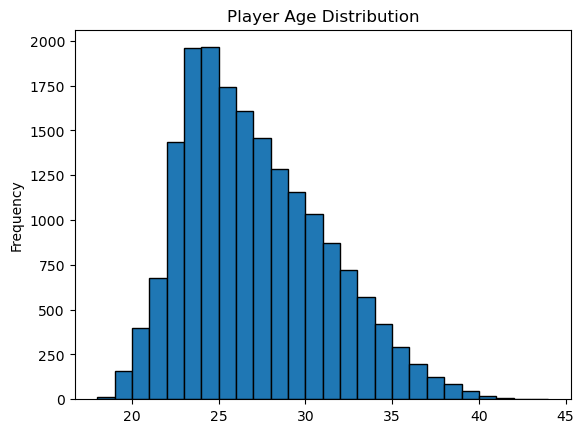

In [165]:
stats["Age"].plot(kind="hist", bins=26, edgecolor="k")
plt.title("Player Age Distribution")

Most players **peak between 23 and 28**.

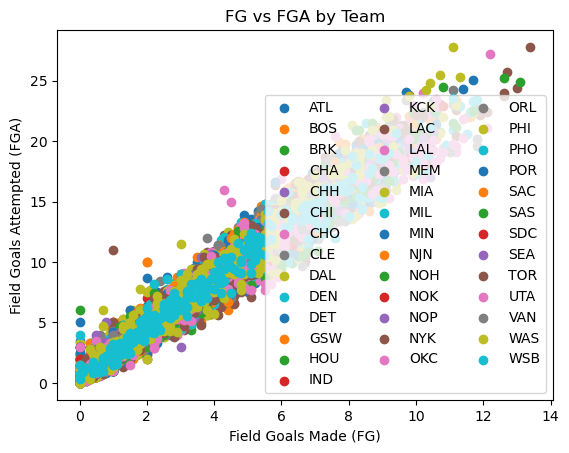

In [170]:
# Group by team
grouped = stats.groupby("Tm")

# Create scatter plots for each team
for team, group_data in grouped:
    plt.scatter(group_data["FG"], group_data["FGA"], label=team)

plt.xlabel("Field Goals Made (FG)")
plt.ylabel("Field Goals Attempted (FGA)")
plt.title("FG vs FGA by Team")
plt.legend(ncol=3)

#### Highest Scoring Players in a season.

In [171]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending = False).head(10)

In [172]:
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
12604,Michael Jordan,SG,23.0,CHI,82.0,82.0,40.0,13.4,27.8,0.482,...,780.0,0.576,Chicago Bulls,40.0,42.0,0.488,17.0,104.8,103.9,1.26
11825,James Harden,PG,29.0,HOU,78.0,78.0,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
1180,Kobe Bryant,SG,27.0,LAL,80.0,80.0,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
15003,Michael Jordan,SG,24.0,CHI,82.0,82.0,40.4,13.0,24.4,0.535,...,800.0,0.831,Chicago Bulls,50.0,32.0,0.610,4.0,105.0,101.6,3.76
12134,Michael Jordan,SG,26.0,CHI,82.0,82.0,39.0,12.6,24.0,0.526,...,920.0,0.613,Chicago Bulls,55.0,27.0,0.671,4.0,109.5,106.2,2.74
18231,George Gervin,SG,27.0,SAS,78.0,NaN,37.6,13.1,24.9,0.528,...,221.0,0.086,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24
5448,Allen Iverson,PG,30.0,PHI,72.0,72.0,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
12171,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
13107,Michael Jordan,SG,25.0,CHI,81.0,81.0,40.2,11.9,22.2,0.538,...,850.0,0.704,Chicago Bulls,47.0,35.0,0.573,16.0,106.4,105.0,2.13
17864,George Gervin,SG,29.0,SAS,79.0,79.0,35.7,12.6,25.2,0.500,...,690.0,0.159,San Antonio Spurs,48.0,34.0,0.585,0.0,113.1,110.8,1.79


<Axes: xlabel='Player'>

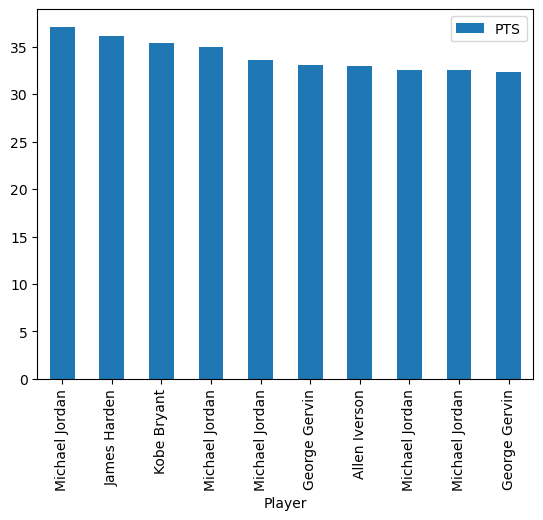

In [173]:
highest_scoring.plot.bar("Player", "PTS")

#### Highest Scoring Players ever.

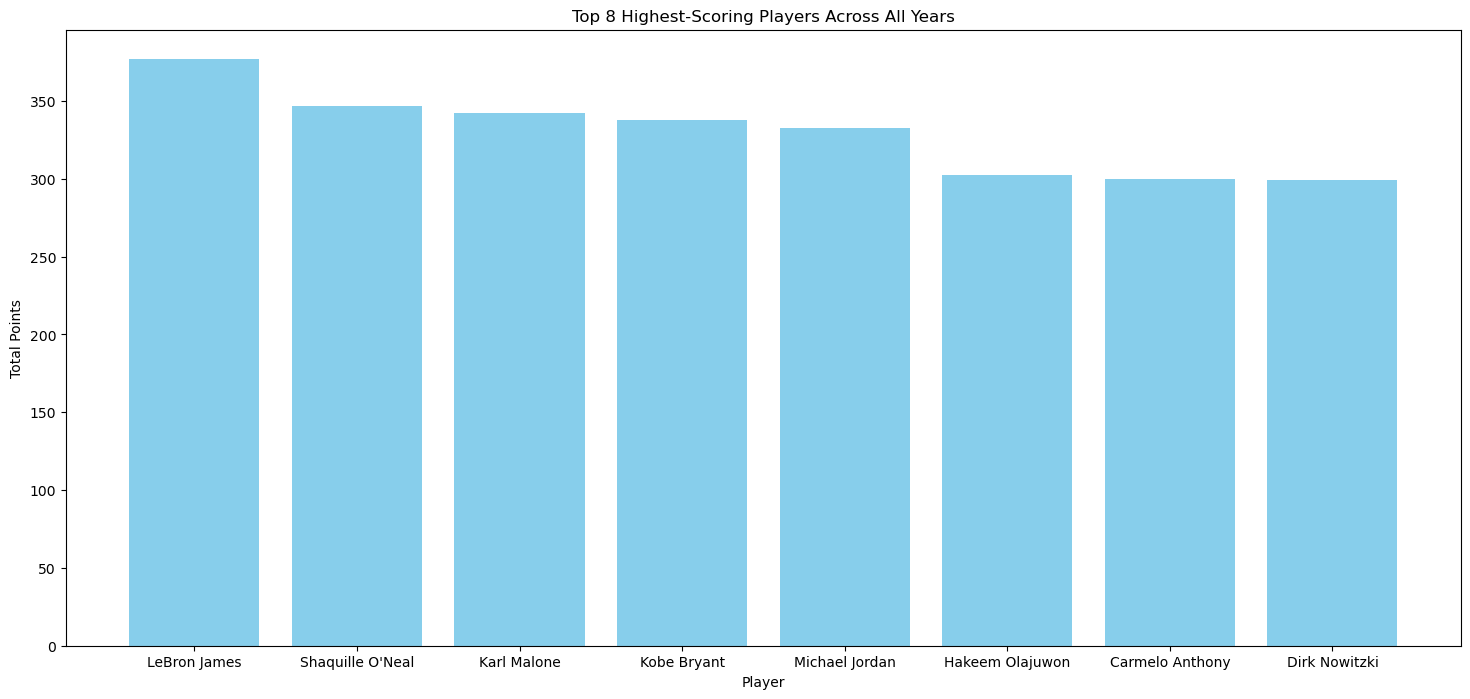

In [185]:
# Calculate total points for each player
stats["TotalPoints"] = stats["FG"] * 2

# Group by player and sum the total points
player_total_points = stats.groupby("Player")["TotalPoints"].sum()

# Sort players by total points in descending order
sorted_players = player_total_points.sort_values(ascending=False)

# Set up the figure
plt.figure(figsize=(18, 8))

# Number of top players to display
N = 8

# Create a bar plot of top N highest-scoring players
plt.bar(sorted_players.index[:N], sorted_players[:N], color="skyblue")
plt.xlabel("Player")
plt.ylabel("Total Points")
plt.title(f"Top {N} Highest-Scoring Players Across All Years")

plt.show()

#### Highest number of avg points in each year.

In [186]:
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending= False).head(1))

<Axes: xlabel='Year'>

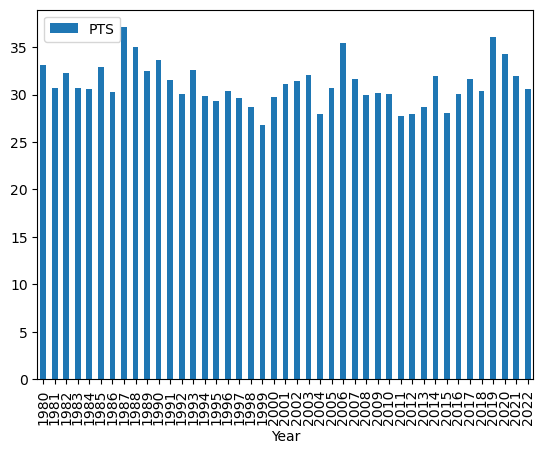

In [187]:
highest_scoring.plot.bar("Year", "PTS")

#### Looking at any correlation between MVP vote share and other columns.

In [189]:
## looking at any correlations with share.
stats.corr()["Share"]

/var/folders/gw/w91jngyn5jj1gy9xk_4wxqjc0000gn/T/ipykernel_6137/2405375433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()["Share"]


Age            0.019771
G              0.090649
GS             0.173365
MP             0.169474
FG             0.277338
FGA            0.251498
FG%            0.070902
3P             0.081570
3PA            0.082126
3P%            0.010996
2P             0.274322
2PA            0.250980
2P%            0.066782
eFG%           0.063834
FT             0.320858
FTA            0.320733
FT%            0.046141
ORB            0.121387
DRB            0.222082
TRB            0.198837
AST            0.203721
STL            0.184219
BLK            0.154023
TOV            0.235081
PF             0.073827
PTS            0.291242
Year          -0.014748
Pts Won        0.983359
Pts Max        0.514299
Share          1.000000
W              0.126642
L             -0.125136
W/L%           0.129333
GB            -0.105045
PS/G           0.046697
PA/G          -0.032383
SRS            0.123387
TotalPoints    0.277338
Name: Share, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap of NBA Player Statistics')

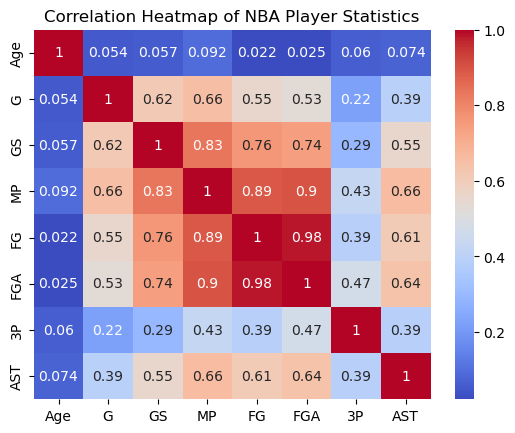

In [194]:
import seaborn as sns

numeric_columns = ["Age", "G", "GS", "MP", "FG", "FGA", "3P", "AST"]
correlation_matrix = stats[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of NBA Player Statistics")
